In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel(r'C:\Users\aydar\Downloads\Задание. Отчет и закономерности.xlsx')

In [3]:
df.head()

,клиент,обращение,open_dttm,month1,month,month_year,validity,guilt,rating,nps_group,promoter,neutral,detractor,business_line,emotional,client_comment
0,155495176.0,1,2020-03-31 17:50:09,2020-03-01 00:00:00,3,3.20,Обоснован,Положительный отзыв,5,Промоутер,1,0,0,первая линия,Позитив,Мобильное приложение
1,342605900.0,2,2019-10-26 19:24:37,2019-10-01 00:00:00,10,10.19,Частично обоснован,Вина сотрудника,1,Детрактор,0,0,1,вторая линия,Негатив,Работа сотрудника
2,268290195.0,3,2018-11-20 18:27:37,2018-11-01 00:00:00,11,11.18,NaN,Системы банка+сотрудники,1,Детрактор,0,0,1,вторая линия,Негатив,Сроки рассмотрения заявки
3,117970757.0,4,2019-12-15 18:25:01,2019-12-01 00:00:00,12,12.19,Обоснован,Вина банка,1,Детрактор,0,0,1,третья линия,Негатив,Навязывание услуг/продуктов банка
4,110261507.0,5,2019-09-19 09:57:20,2019-09-01 00:00:00,9,9.19,Не обоснован,Вина клиента,1,Детрактор,0,0,1,шестая линия,NaN,NaN


In [4]:
df['month1'] = df['month1'].str.replace('00:00:00', '')

In [5]:
df['open_dttm'] = pd.to_datetime(df['open_dttm']) 
df['day_of_week'] = df['open_dttm'].dt.weekday_name
df['hour'] = df['open_dttm'].dt.hour

In [6]:
df.head()

,клиент,обращение,open_dttm,month1,month,month_year,validity,guilt,rating,nps_group,promoter,neutral,detractor,business_line,emotional,client_comment,day_of_week,hour
0,155495176.0,1,2020-03-31 17:50:09,2020-03-01,3,3.20,Обоснован,Положительный отзыв,5,Промоутер,1,0,0,первая линия,Позитив,Мобильное приложение,Tuesday,17
1,342605900.0,2,2019-10-26 19:24:37,2019-10-01,10,10.19,Частично обоснован,Вина сотрудника,1,Детрактор,0,0,1,вторая линия,Негатив,Работа сотрудника,Saturday,19
2,268290195.0,3,2018-11-20 18:27:37,2018-11-01,11,11.18,NaN,Системы банка+сотрудники,1,Детрактор,0,0,1,вторая линия,Негатив,Сроки рассмотрения заявки,Tuesday,18
3,117970757.0,4,2019-12-15 18:25:01,2019-12-01,12,12.19,Обоснован,Вина банка,1,Детрактор,0,0,1,третья линия,Негатив,Навязывание услуг/продуктов банка,Sunday,18
4,110261507.0,5,2019-09-19 09:57:20,2019-09-01,9,9.19,Не обоснован,Вина клиента,1,Детрактор,0,0,1,шестая линия,NaN,NaN,Thursday,9


In [7]:
df.shape

(27350, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27350 entries, 0 to 27349
Data columns (total 18 columns):
клиент            26644 non-null float64
обращение         27350 non-null int64
open_dttm         27350 non-null datetime64[ns]
month1            27350 non-null object
month             27350 non-null int64
month_year        27350 non-null float64
validity          26370 non-null object
guilt             24932 non-null object
rating            27350 non-null object
nps_group         27350 non-null object
promoter          27350 non-null int64
neutral           27350 non-null int64
detractor         27350 non-null int64
business_line     27350 non-null object
emotional         23314 non-null object
client_comment    23314 non-null object
day_of_week       27350 non-null object
hour              27350 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(9)
memory usage: 3.8+ MB


In [9]:
df.isnull().sum()

клиент             706
обращение            0
open_dttm            0
month1               0
month                0
month_year           0
validity           980
guilt             2418
rating               0
nps_group            0
promoter             0
neutral              0
detractor            0
business_line        0
emotional         4036
client_comment    4036
day_of_week          0
hour                 0
dtype: int64

In [10]:
df.describe()

,клиент,обращение,month,month_year,promoter,neutral,detractor,hour
count,2.664400e+04,27350.000000,27350.000000,27350.000000,27350.000000,27350.000000,27350.000000,27350.000000
mean,2.134105e+08,13675.500000,5.989250,6.181929,0.555356,0.033857,0.410786,11.134406
std,1.114238e+08,7895.409267,3.485908,3.482881,0.496935,0.180865,0.491985,5.937891
min,9.209000e+03,1.000000,1.000000,1.190000,0.000000,0.000000,0.000000,0.000000
25%,1.318439e+08,6838.250000,3.000000,3.200000,0.000000,0.000000,0.000000,5.000000
50%,2.238324e+08,13675.500000,6.000000,6.190000,1.000000,0.000000,0.000000,12.000000
75%,2.824460e+08,20512.750000,9.000000,9.190000,1.000000,0.000000,1.000000,16.000000
max,5.204677e+08,27350.000000,12.000000,12.190000,1.000000,1.000000,1.000000,23.000000


In [11]:
df.nunique()

клиент            13287
обращение         27350
open_dttm         15092
month1               21
month                12
month_year           21
validity              3
guilt                26
rating                8
nps_group             3
promoter              2
neutral               2
detractor             2
business_line        15
emotional             2
client_comment       29
day_of_week           7
hour                 24
dtype: int64

In [12]:
correl = df.corr()

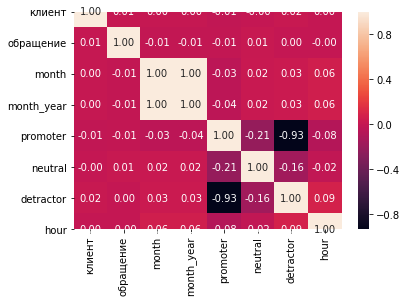

In [13]:
sns.heatmap(correl, annot = True, fmt = '.2f')

Посмотрим процент распределения данных в признаках:

In [14]:
feature_names = df.columns.tolist() 
for column in feature_names: 
    print(column) 
    print(df[column].value_counts(normalize = True))
    print()

клиент
164175477.0    0.003003
350146986.0    0.002477
269133609.0    0.001689
5454021.0      0.001539
119824192.0    0.001426
                 ...   
291517078.0    0.000038
277728681.0    0.000038
66174444.0     0.000038
222756008.0    0.000038
265031650.0    0.000038
Name: клиент, Length: 13287, dtype: float64

обращение
2047     0.000037
17698    0.000037
25894    0.000037
5416     0.000037
7465     0.000037
           ...   
4759     0.000037
27288    0.000037
25241    0.000037
19100    0.000037
2049     0.000037
Name: обращение, Length: 27350, dtype: float64

open_dttm
2019-12-23 11:45:07    0.002925
2019-10-16 16:35:37    0.002340
2019-02-08 05:47:59    0.001974
2019-04-04 02:17:14    0.001463
2019-04-30 01:45:26    0.001316
                         ...   
2019-04-16 05:31:21    0.000037
2020-03-20 12:39:03    0.000037
2018-12-04 01:01:13    0.000037
2020-04-14 18:35:03    0.000037
2019-05-31 14:36:59    0.000037
Name: open_dttm, Length: 15092, dtype: float64

month1
2019-04-01 

In [15]:
#Проумотер - 5; Детрактор - 1+2+негат+3; Нейтрал - 4+нейтрал+позит

Отобразим соотношение оценок и их эмоциональную составляющую:

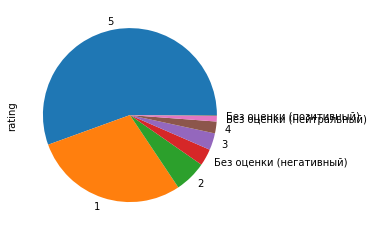

In [16]:
df.rating.value_counts().plot.pie()

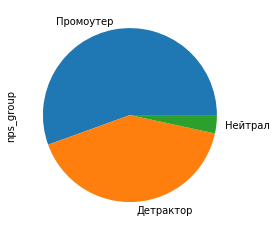

In [17]:
df.nps_group.value_counts().plot.pie()

Теперь посмотрим сколько отзывов с негативной окраской не обоснованны:

In [18]:
emot_valid = df.groupby(['emotional', 'validity'])
emot_valid.size()

emotional  validity          
Негатив    Не обоснован           6339
           Обоснован              1721
           Частично обоснован     1507
Позитив    Не обоснован            137
           Обоснован             12687
           Частично обоснован       61
dtype: int64

In [19]:
emot_valid = emot_valid.size().unstack()
emot_valid

validity,Не обоснован,Обоснован,Частично обоснован
emotional,,,
Негатив,6339,1721,1507
Позитив,137,12687,61


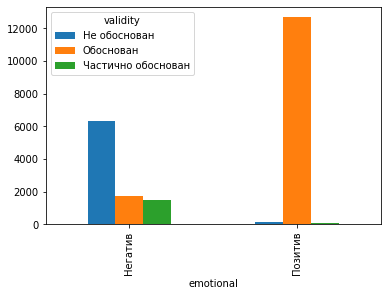

In [20]:
emot_valid.plot(kind = 'bar')

Отметим большое количество негативных отзывов, которые не обоснованны.

Посмотрим на распределение отзывов по часам, неделям и месяцам, сможем посмотреть есть ли пиковые нагрузки и сезонности:

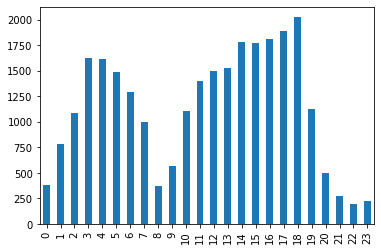

In [21]:
df.hour.value_counts().sort_index().plot.bar()

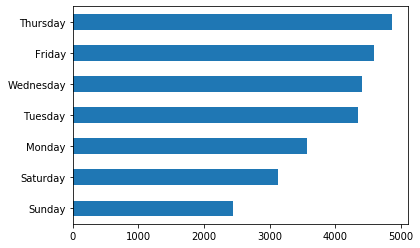

In [22]:
df.day_of_week.value_counts().sort_values().plot.barh()

Как ожидалось меньше всего отзывов на выходных.

Посмотрим влияют ли дни недели на то, какой отзыв.

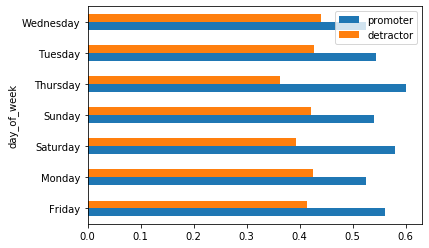

In [23]:
df.groupby("day_of_week")['promoter', 'detractor'].mean().plot.barh()

Явно никакой день не выделяется, разве, что во вторник можно заметить лучшее соотношение промоутеров и детракторов. Посмотрим тогда на месяцы:

Text(0.5, 1.0, 'Обращения по месяцам')

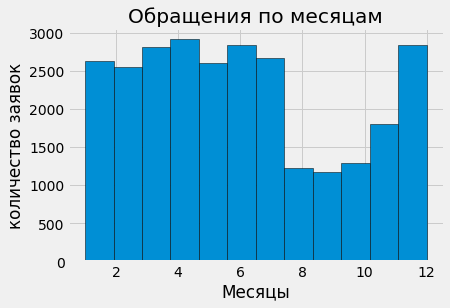

In [24]:
plt.style.use('fivethirtyeight')
plt.hist(df['month'], bins = 12, edgecolor = 'k')
plt.xlabel('Месяцы')
plt.ylabel('количество заявок')
plt.title('Обращения по месяцам')

In [25]:
df.open_dttm.sort_values()

15526   2018-11-13 12:37:35
7046    2018-11-13 16:31:43
4585    2018-11-13 17:06:34
20022   2018-11-13 17:06:34
14233   2018-11-13 17:08:32
                ...        
9128    2020-07-27 18:45:30
3283    2020-07-27 19:03:21
4383    2020-07-27 19:03:21
9263    2020-07-27 19:31:49
7789    2020-07-27 19:31:49
Name: open_dttm, Length: 27350, dtype: datetime64[ns]

Понятно почему такое проседание по некоторым месяцам, хотя видно, что в среднем упадков особых нет. Посмотрим тогда на изменение количества отзывов за все время:

Text(0.5, 1.0, 'Обращения по всем месяцам')

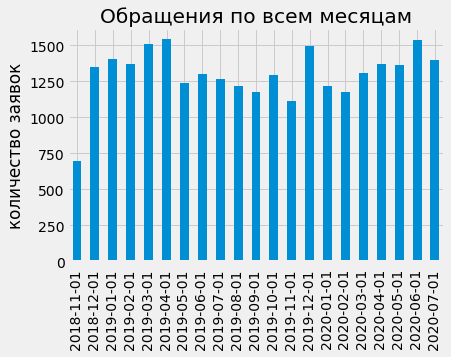

In [26]:
df.month1.value_counts().sort_index().plot.bar()
plt.ylabel('количество заявок')
plt.title('Обращения по всем месяцам')

Количество отзывов растет, посмотрим какие они:

Text(0.5, 1.0, 'Обращения по всем месяцам')

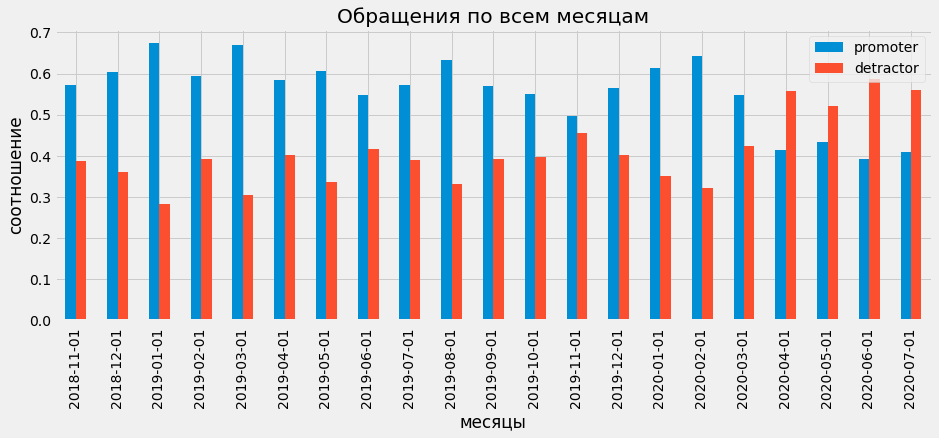

In [27]:
df.groupby("month1")['promoter', 'detractor'].mean().plot.bar(figsize = (14, 5))
plt.xlabel('месяцы')
plt.ylabel('соотношение')
plt.title('Обращения по всем месяцам')

Заметно, что в последние месяцы наблюдается отрицательная динамика индекса чистой поддержки (NPS). Посмотрим соотношение промоутеров и детракторов на отдельных продуктах и бизнес линиях:

Text(0, 0.5, 'соотношение')

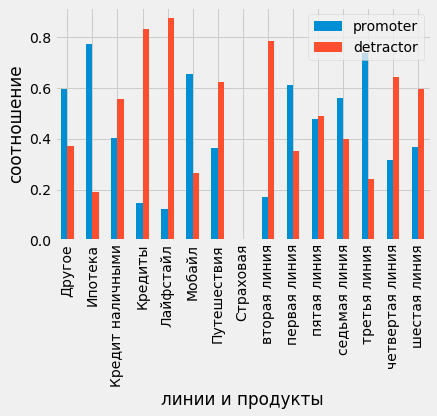

In [28]:
df.groupby("business_line")['promoter', 'detractor'].mean().plot.bar()
plt.xlabel('линии и продукты')
plt.ylabel('соотношение')

Теперь видно у каких линий и продуктов преобладают детракторы, посмотрим на их динамику за все месяцы:

In [29]:
def line_month(line):
    a = df.groupby(["business_line", 'month1'])['promoter', 'detractor'].mean()
    return a.loc[line].plot.bar()

Text(0.5, 1.0, 'Кредиты')

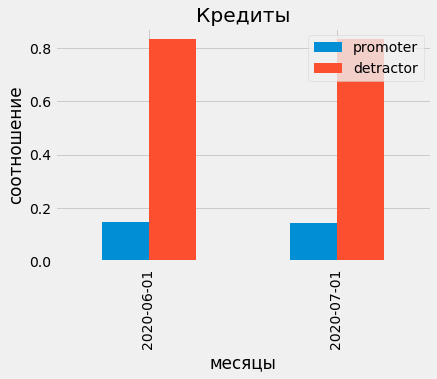

In [30]:
line_month('Кредиты')
plt.xlabel('месяцы')
plt.ylabel('соотношение')
plt.title('Кредиты')

Text(0.5, 1.0, 'Лайфстайл')

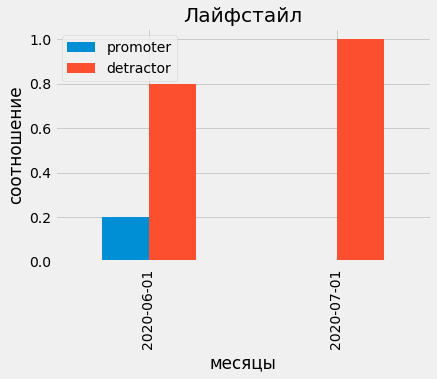

In [31]:
line_month('Лайфстайл')
plt.xlabel('месяцы')
plt.ylabel('соотношение')
plt.title('Лайфстайл')

Text(0.5, 1.0, 'Вторая линия')

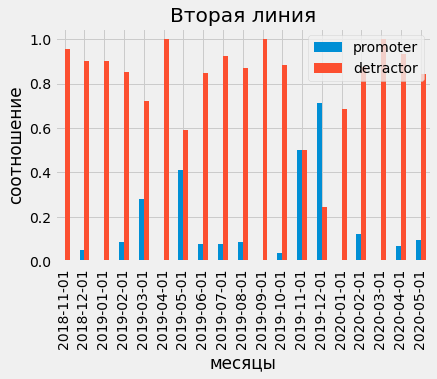

In [32]:
line_month('вторая линия')
plt.xlabel('месяцы')
plt.ylabel('соотношение')
plt.title('Вторая линия')

У подуктов "кредиты" и "лайфстал", отзывы только за 2 месяца, возможно, что еще не все процессы отлажены, поэтмоу такое количество недовольных клиентов. А на второй линии наблюдаются стабильно недовольные клиенты, кроме пары месяцев.

Я провел анализ, посмотрел в каких признаках какое соотношение данных, заметил необоснованность негативных отзывов, обнаружил дневной тренд по количетсву заявок, отметил негативную тенденцию увеличения детракторов, а также посмотрел в каких именно продуктах это происходит.